In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import descriptives as dcts
import download
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
eviction = download.load_evict('../inputs/eviction_data_tract.csv')
crime = download.load_crime('../inputs/crime_by_tract.csv')
buildings = download.load_building('../inputs/building_violation_by_tract.csv')
acs = download.load_acs('../inputs/acs_year_tract.csv')
education = download.load_education('../inputs/educ_year_tract.csv')
tracts = download.load_tract('../inputs/ch_opdat/tracts.csv', True)
geo_tracts = download.convert_to_geopandas(tracts, 'location')
eviction_df = download.join_bases(eviction, acs, education, crime, buildings, geo_tracts, True)

In [69]:
variables = ['prediction_lr', 'prediction_rf', 'tract', 'location', 'geometry']
results = pd.read_csv('rf_lr_results.csv', dtype={'tract': str})
results_gdf = pd.merge(geo_tracts, results, on = 'tract', how='outer')
results_gdf = results_gdf[variables]

# Maps

In [51]:
start_year = 2010
end_year = 2017
year_to_map = list(range(start_year, end_year + 1))
variables_to_map = ['eviction_filings_rate', 'eviction_order_yes']

## Predictions

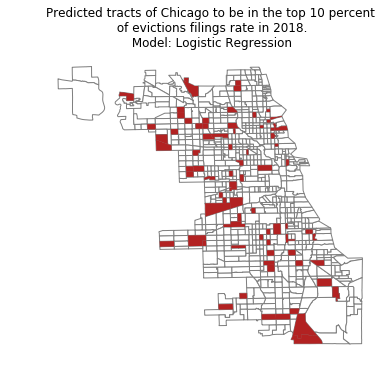

In [75]:
dcts.map_predictions(results_gdf, 'prediction_lr', 'LR', save_fig=True, year_pred='2018')

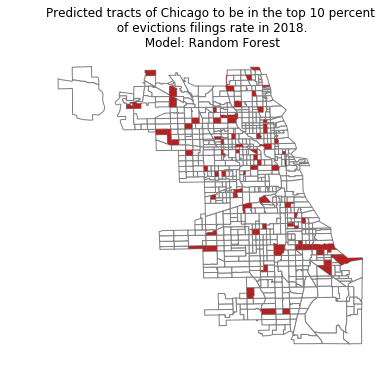

In [76]:
dcts.map_predictions(results_gdf, 'prediction_rf', 'RF', save_fig=True, year_pred='2018')

### Tracts in the top decile

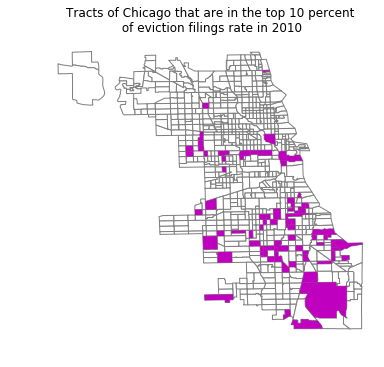

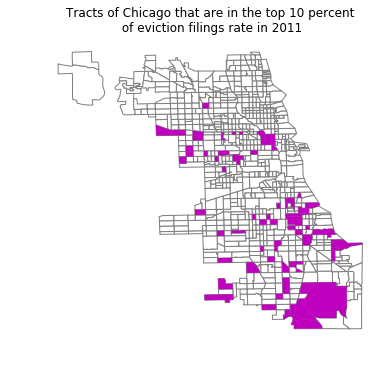

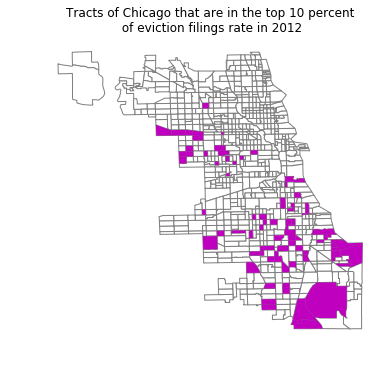

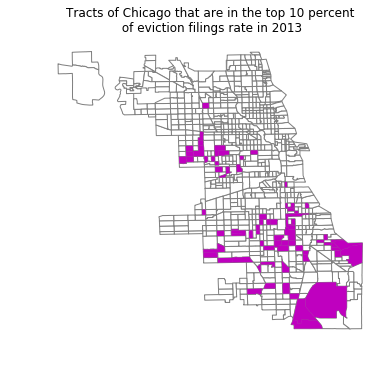

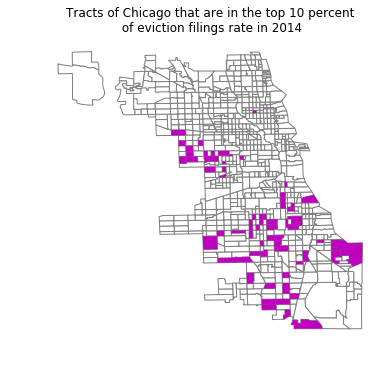

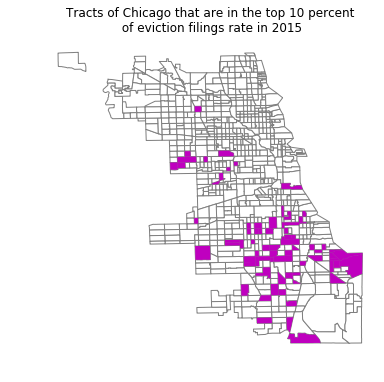

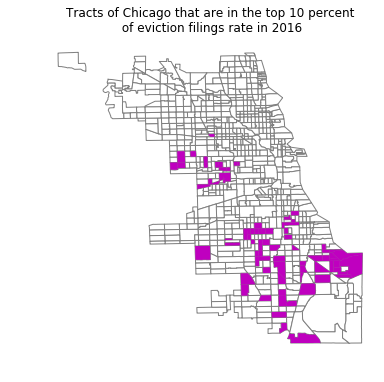

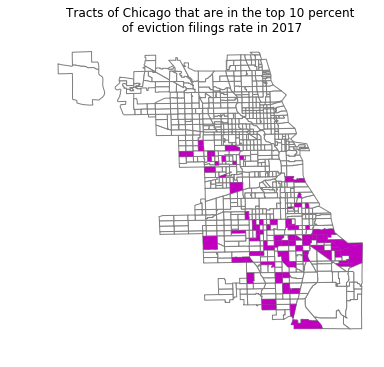

In [53]:
dcts.plot_top_10pct_tracts(eviction_df, variables_to_map[0], year_to_map, False)

### Tracts k times in the top decile

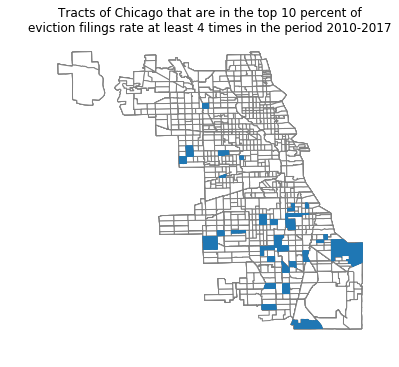

There are 47 tracts with that are on the top decile at least for 4 periods



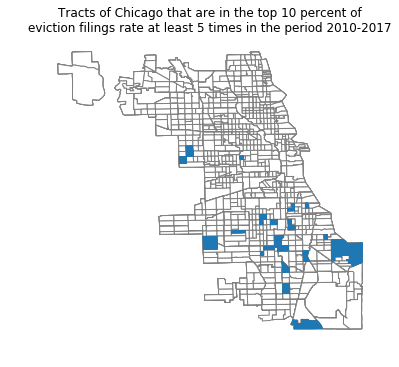

There are 32 tracts with that are on the top decile at least for 5 periods



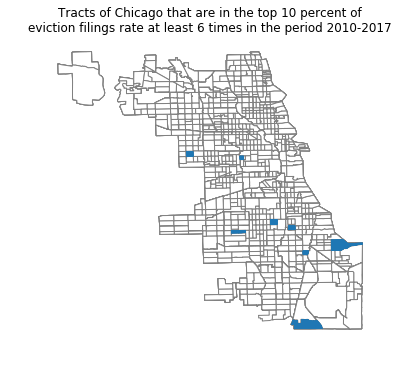

There are 11 tracts with that are on the top decile at least for 6 periods



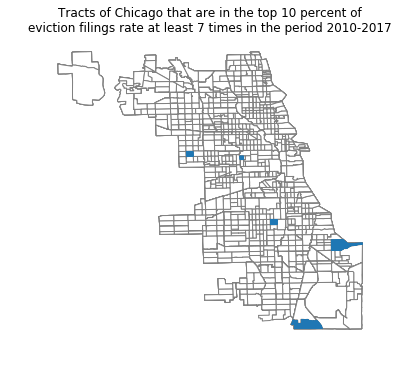

There are 8 tracts with that are on the top decile at least for 7 periods



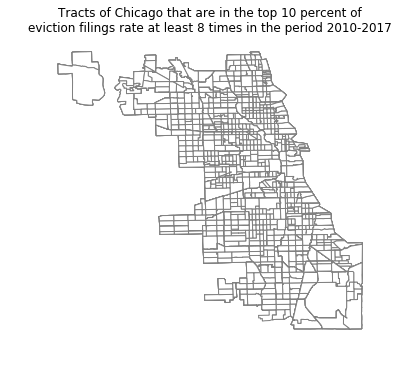

There are 0 tracts with that are on the top decile at least for 8 periods



In [15]:
for k in range(4,9):
    tracts = dcts.plot_top_10pct_tracts_ktimes(eviction_df, variables_to_map[0], k, get_tracts=True, save_fig=True)
    print('There are {} tracts with that are on the top decile at least for {} periods'.format(len(tracts), k))
    print()

### Evictions filings rate and eviction order yes per year

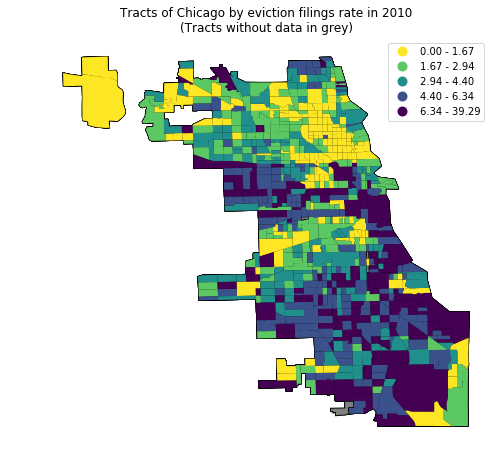

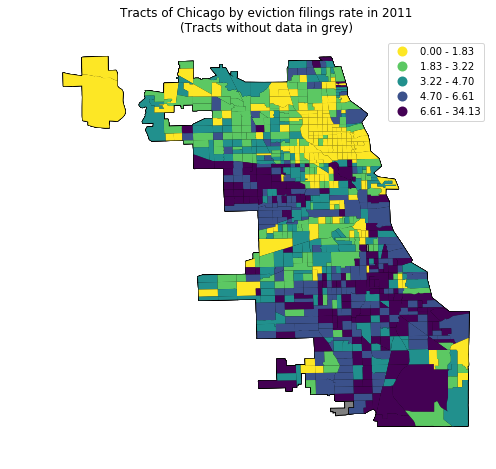

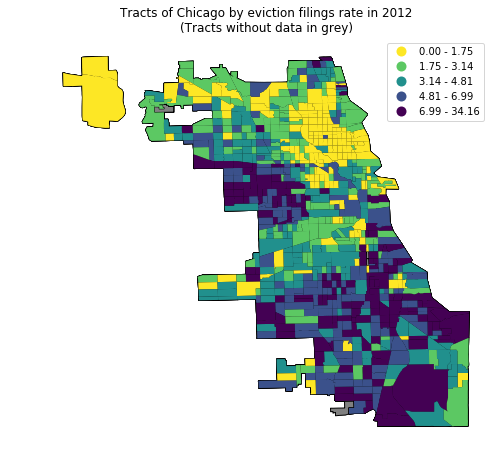

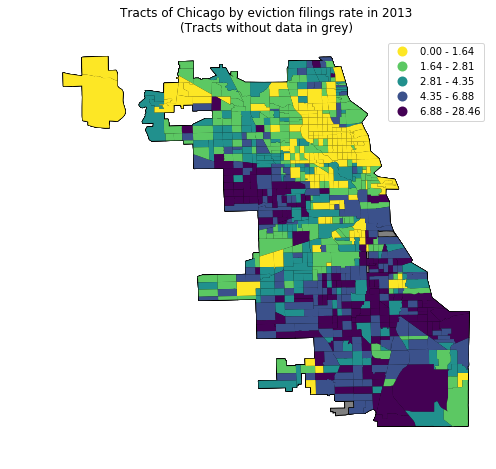

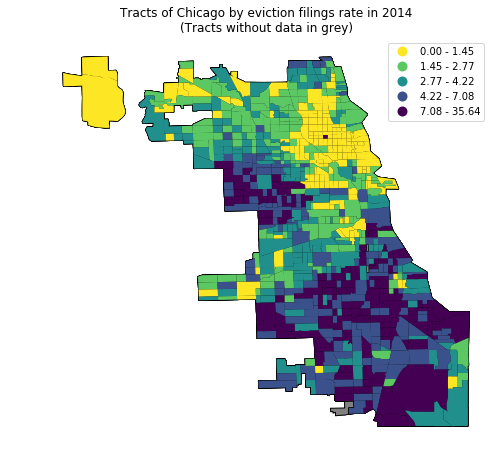

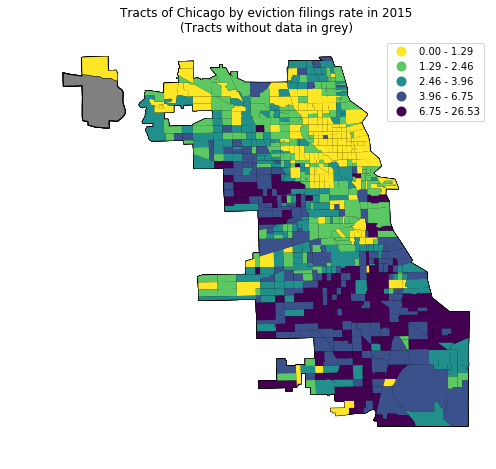

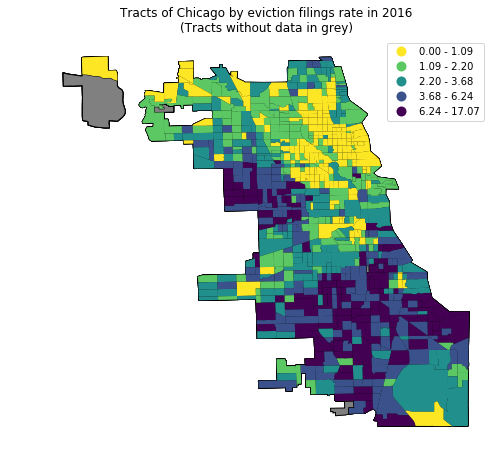

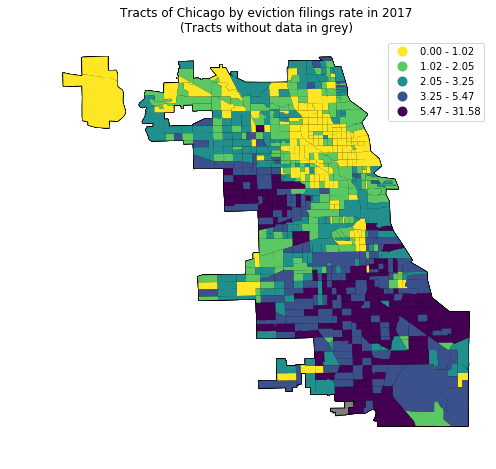

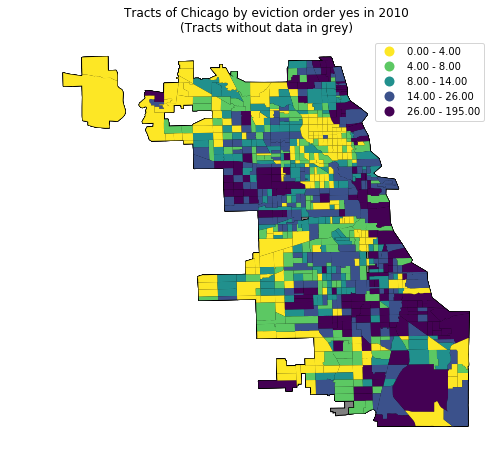

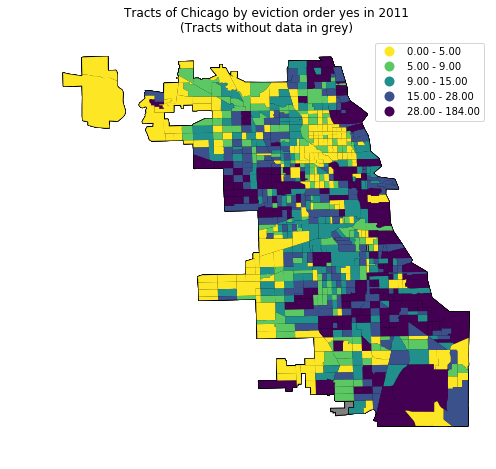

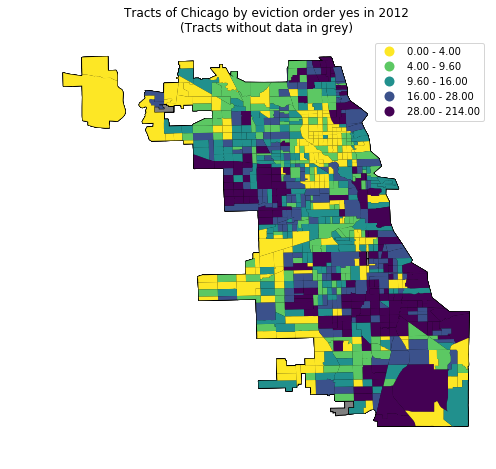

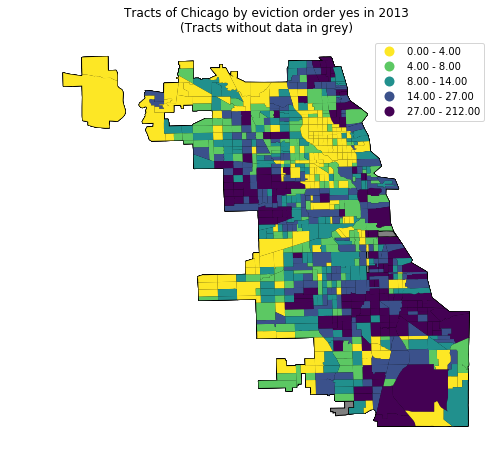

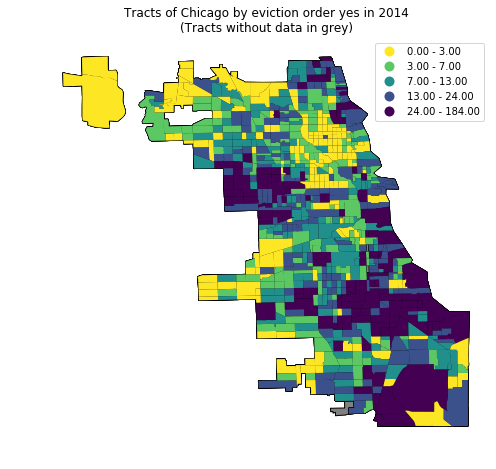

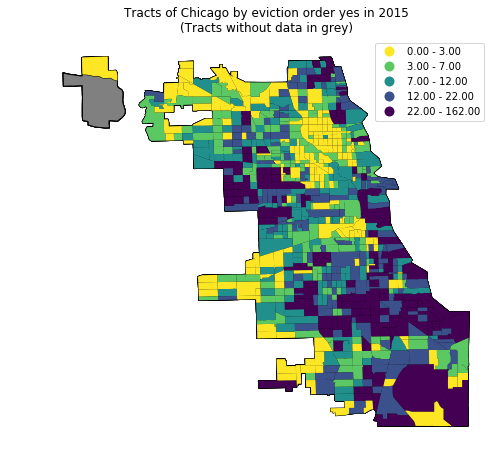

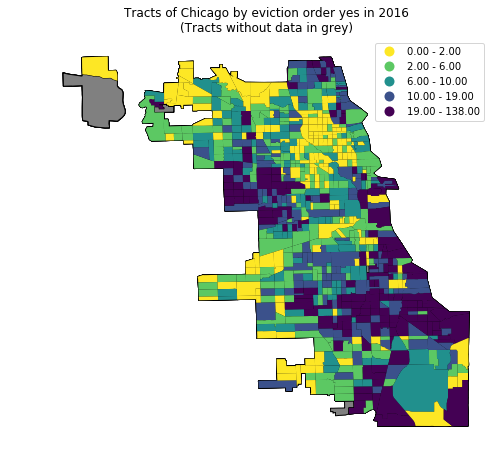

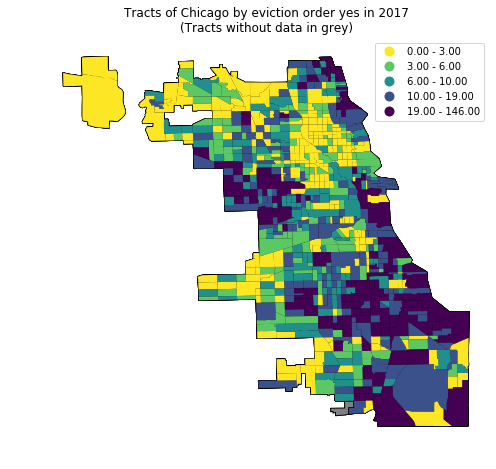

In [27]:
for variable in variables_to_map:
    for year in year_to_map:
        dcts.plot_map(eviction_df, variable, year, save_fig=True)